In [345]:
import os
import json
import shutil
import re
from bs4 import BeautifulSoup as bs
import pandas as pd
from PIL import Image,ImageDraw
from torch.optim import AdamW
from transformers import get_scheduler
import torch
from transformers import LayoutLMTokenizer, LayoutLMModel
import torch.nn as nn
from PIL import ImageFont

# Reading Data Set

In [2]:
ptn_tr_path = os.scandir("D:/pubtabnet/train/")

In [3]:
ptn_down_sample_path = "D:/pubsmall/train"
if not  os.path.exists(ptn_down_sample_path):
    os.makedirs(ptn_down_sample_path)

# Preprocessing Dataset

In [4]:


def format_html(img):
    ''' Formats HTML code from tokenized annotation of img
    '''
    html_string = '''<html>
                     <head>
                     <meta charset="UTF-8">
                     <style>
                     table, th, td {
                       border: 1px solid black;
                       font-size: 10px;
                     }
                     </style>
                     </head>
                     <body>
                     <table frame="hsides" rules="groups" width="100%%">
                         %s
                     </table>
                     </body>
                     </html>''' % ''.join(img['html']['structure']['tokens'])
    cell_nodes = list(re.finditer(r'(<td[^<>]*>)(</td>)', html_string))
    assert len(cell_nodes) == len(img['html']['cells']), 'Number of cells defined in tags does not match the length of cells'
    cells = [(''.join(c['tokens']),c['bbox']) for c in img['html']['cells'] if "bbox" in c.keys()]
    
    offset = 0
    for n, cell in zip(cell_nodes, cells):
        pos = "*#$"+"-".join([str(i) for i in cell[1]])+ "*#$"
        html_string = html_string[:n.end(1) + offset] + cell[0]+ pos + html_string[n.start(2) + offset:]
        offset += len(cell[0]+pos)
    
    return html_string

In [5]:
def pos_extractor(text_pos):
    if not isinstance(text_pos,str) or not "*#$" in text_pos:
        return "",[]
    tmp = text_pos.split("*#$")
    text = tmp[0]
    pos_text = tmp[1]
    pos = [int(i) for i in pos_text.split("-")]
    return text,pos
    

In [6]:
def retrive_structured_data(df,file):
    data_dict =[]
    for n,header in enumerate(df.columns):
        cell_data = {}
        text,pos = pos_extractor(header)
        cell_data["text"] = text
        cell_data["pos"] = pos
        cell_data["row"] = 0
        cell_data["col"] = n
        cell_data["filename"] = file
        data_dict.append(cell_data)
        
    for i,row in enumerate(df.values):
        for j,cd in enumerate(row):
            cell_data = {}
            text,pos = pos_extractor(cd)
            cell_data["text"] = text
            cell_data["pos"] = pos
            cell_data["row"] = i+1
            cell_data["col"] = j
            cell_data["filename"] = file
            data_dict.append(cell_data)
    
    return data_dict


In [210]:
count = 1
df = None
with open("D:/pubtabnet/PubTabNet_2.0.0.jsonl","r",encoding="utf8") as fp:
    for n,data in enumerate(fp):
        
        print(n)
        data = json.loads(data)
        if not os.path.exists("D:/pubsmall/train/{}".format(data["filename"])):
            try:    
                html_table = format_html(data)
                print(html_table)
                html_table = format_html(data)
                df = pd.read_html(html_table)
                if df:
                    json_data = retrive_structured_data(df[0],data['filename'])

                    with open("D:/pubsmall/train/{}.json".format(data["filename"].split(".")[0]), 'w') as f:
                        json.dump(json_data, f)
                    shutil.copy("D:/pubtabnet/{}/{}".format(data["split"],data["filename"]),"D:/pubsmall/train/{}".format(data["filename"]))
                if n>=count:
                    break
            except Exception as e:
                print(str(e))
                

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265


3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924


5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006


7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000


9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
100

11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
1158

12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
1314

14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
1472

16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
1623

17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
1783

19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
19266
19267
19268
19269
19270
19271
19272
19273
19274
19275
19276
19277
19278
19279
19280
19281
19282
19283
19284
19285
19286
19287
19288
19289
19290
19291
19292
19293
19294
19295
19296
19297
19298
19299
19300
19301
19302
19303
19304
19305
19306
19307
19308
19309
19310
19311
19312
19313
19314
19315
19316
19317
19318
19319
19320
19321
19322
19323
19324
19325
19326
19327
19328
19329
19330
19331
19332
19333
19334
19335
19336
19337
19338
19339
19340
19341
19342
19343
19344
19345
19346
19347
19348
19349
19350
19351
19352
19353
19354
19355
19356
19357
19358
19359
19360
19361
19362
19363
19364
19365
19366
19367
1936

20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
2088

22275
22276
22277
22278
22279
22280
22281
22282
22283
22284
22285
22286
22287
22288
22289
22290
22291
22292
22293
22294
22295
22296
22297
22298
22299
22300
22301
22302
22303
22304
22305
22306
22307
22308
22309
22310
22311
22312
22313
22314
22315
22316
22317
22318
22319
22320
22321
22322
22323
22324
22325
22326
22327
22328
22329
22330
22331
22332
22333
22334
22335
22336
22337
22338
22339
22340
22341
22342
22343
22344
22345
22346
22347
22348
22349
22350
22351
22352
22353
22354
22355
22356
22357
22358
22359
22360
22361
22362
22363
22364
22365
22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
2244

23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
2401

25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25459
25460
25461
25462
25463
25464
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
2554

26863
26864
26865
26866
26867
26868
26869
26870
26871
26872
26873
26874
26875
26876
26877
26878
26879
26880
26881
26882
26883
26884
26885
26886
26887
26888
26889
26890
26891
26892
26893
26894
26895
26896
26897
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
2702

28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
28541
28542
28543
28544
28545
28546
28547
28548
28549
28550
28551
28552
28553
28554
28555
28556
28557
28558
28559
28560
28561
28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
28574
28575
28576
28577
28578
28579
28580
28581
28582
28583
28584
28585
28586
28587
28588
28589
28590
28591
28592
28593
28594
28595
2859

29880
29881
29882
29883
29884
29885
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29898
29899
29900
29901
29902
29903
29904
29905
29906
29907
29908
29909
29910
29911
29912
29913
29914
29915
29916
29917
29918
29919
29920
29921
29922
29923
29924
29925
29926
29927
29928
29929
29930
29931
29932
29933
29934
29935
29936
29937
29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
29966
29967
29968
29969
29970
29971
29972
29973
29974
29975
29976
29977
29978
29979
29980
29981
29982
29983
29984
29985
29986
29987
29988
29989
29990
29991
29992
29993
29994
29995
29996
29997
29998
29999
30000
30001
30002
30003
30004
30005
30006
30007
30008
30009
30010
30011
30012
30013
30014
30015
30016
30017
30018
30019
30020
30021
30022
30023
30024
30025
30026
30027
30028
30029
30030
30031
30032
30033
30034
30035
30036
30037
30038
30039
30040
30041
30042
30043
30044
30045
3004

31437
31438
31439
31440
31441
31442
31443
31444
31445
31446
31447
31448
31449
31450
31451
31452
31453
31454
31455
31456
31457
31458
31459
31460
31461
31462
31463
31464
31465
31466
31467
31468
31469
31470
31471
31472
31473
31474
31475
31476
31477
31478
31479
31480
31481
31482
31483
31484
31485
31486
31487
31488
31489
31490
31491
31492
31493
31494
31495
31496
31497
31498
31499
31500
31501
31502
31503
31504
31505
31506
31507
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31519
31520
31521
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31533
31534
31535
31536
31537
31538
31539
31540
31541
31542
31543
31544
31545
31546
31547
31548
31549
31550
31551
31552
31553
31554
31555
31556
31557
31558
31559
31560
31561
31562
31563
31564
31565
31566
31567
31568
31569
31570
31571
31572
31573
31574
31575
31576
31577
31578
31579
31580
31581
31582
31583
31584
31585
31586
31587
31588
31589
31590
31591
31592
31593
31594
31595
31596
31597
31598
31599
31600
31601
31602
3160

33006
33007
33008
33009
33010
33011
33012
33013
33014
33015
33016
33017
33018
33019
33020
33021
33022
33023
33024
33025
33026
33027
33028
33029
33030
33031
33032
33033
33034
33035
33036
33037
33038
33039
33040
33041
33042
33043
33044
33045
33046
33047
33048
33049
33050
33051
33052
33053
33054
33055
33056
33057
33058
33059
33060
33061
33062
33063
33064
33065
33066
33067
33068
33069
33070
33071
33072
33073
33074
33075
33076
33077
33078
33079
33080
33081
33082
33083
33084
33085
33086
33087
33088
33089
33090
33091
33092
33093
33094
33095
33096
33097
33098
33099
33100
33101
33102
33103
33104
33105
33106
33107
33108
33109
33110
33111
33112
33113
33114
33115
33116
33117
33118
33119
33120
33121
33122
33123
33124
33125
33126
33127
33128
33129
33130
33131
33132
33133
33134
33135
33136
33137
33138
33139
33140
33141
33142
33143
33144
33145
33146
33147
33148
33149
33150
33151
33152
33153
33154
33155
33156
33157
33158
33159
33160
33161
33162
33163
33164
33165
33166
33167
33168
33169
33170
33171
3317

34522
34523
34524
34525
34526
34527
34528
34529
34530
34531
34532
34533
34534
34535
34536
34537
34538
34539
34540
34541
34542
34543
34544
34545
34546
34547
34548
34549
34550
34551
34552
34553
34554
34555
34556
34557
34558
34559
34560
34561
34562
34563
34564
34565
34566
34567
34568
34569
34570
34571
34572
34573
34574
34575
34576
34577
34578
34579
34580
34581
34582
34583
34584
34585
34586
34587
34588
34589
34590
34591
34592
34593
34594
34595
34596
34597
34598
34599
34600
34601
34602
34603
34604
34605
34606
34607
34608
34609
34610
34611
34612
34613
34614
34615
34616
34617
34618
34619
34620
34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34631
34632
34633
34634
34635
34636
34637
34638
34639
34640
34641
34642
34643
34644
34645
34646
34647
34648
34649
34650
34651
34652
34653
34654
34655
34656
34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34679
34680
34681
34682
34683
34684
34685
34686
34687
3468

36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
36212
36213
36214
36215
36216
36217
36218
36219
3622

37634
37635
37636
37637
37638
37639
37640
37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
37698
37699
37700
37701
37702
37703
37704
37705
37706
37707
37708
37709
37710
37711
37712
37713
37714
37715
37716
37717
37718
37719
37720
37721
37722
37723
37724
37725
37726
37727
37728
37729
37730
37731
37732
37733
37734
37735
37736
37737
37738
37739
37740
37741
37742
37743
37744
37745
37746
37747
37748
37749
37750
37751
37752
37753
37754
37755
37756
37757
37758
37759
37760
37761
37762
37763
37764
37765
37766
37767
37768
37769
37770
37771
37772
37773
37774
37775
37776
37777
37778
37779
37780
37781
37782
37783
37784
37785
37786
37787
37788
37789
37790
37791
37792
37793
37794
37795


KeyboardInterrupt: 

# Model Building

In [13]:
tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

In [14]:
class TTLA(torch.nn.Module):
    def __init__(self, dropout=0.1):
        super(TTLA, self).__init__()
        self.llm = LayoutLMModel.from_pretrained("microsoft/layoutlm-base-uncased")
        self.row = torch.nn.Linear(768, 20)
        self.col = torch.nn.Linear(768, 20) 
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, input_ids,bbox,attention_mask,token_type_ids):
        output= self.llm(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
        row_output = self.row(output.last_hidden_state)
        row_output = self.sigmoid(row_output)
        
        col_output = self.col(output.last_hidden_state)
        col_output = self.sigmoid(col_output)
        
        
        return row_output,col_output
    
model = TTLA()

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing LayoutLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:


def normalize_bbox(bbox, width, height):
    return [
        int(1000 * (bbox[0] / width)),
        int(1000 * (bbox[1] / height)),
        int(1000 * (bbox[2] / width)),
        int(1000 * (bbox[3] / height)),
    ]


def preprocess(words,normalized_word_boxes):
    token_boxes = []
    for word, box in zip(words, normalized_word_boxes):
        word_tokens = tokenizer.tokenize(word)
        token_boxes.extend([box] * len(word_tokens))
    # add bounding boxes of cls + sep tokens
    token_boxes = [[0, 0, 0, 0]] + token_boxes + [[1000, 1000, 1000, 1000]]
    encoding = tokenizer(" ".join(words), return_tensors="pt")
    input_ids = encoding["input_ids"]
    attention_mask = encoding["attention_mask"]
    token_type_ids = encoding["token_type_ids"]
    bbox = torch.tensor([token_boxes])    
    return input_ids,bbox,attention_mask,token_type_ids




In [16]:
def dataloader():
    for i in os.scandir("D:/pubsmall/train/"):
        if i.name.endswith("json"):
            json_file = i.path
            image_file = i.name.split(".")[0]+".png"
            parent = os.path.dirname(json_file)
            image_file = os.path.join(parent,image_file)

            if os.path.exists(image_file):
                with open(json_file,"r") as fp:
                    json_data = json.load(fp)
                    pil_im = Image.open(image_file, 'r')
        #             draw = ImageDraw.Draw(pil_im)
        #             draw.rectangle(json_data[3]["pos"] ,outline="black",width=2)
        #             pil_im.show()
                    w,h = pil_im.size
                    norm_data = [ (j['text'],normalize_bbox(j['pos'],w,h),j['row'],j['col'],j['filename'] ) for j in json_data if len(j['pos'])==4]   
                    print(json_data[0]['filename'])
                    yield norm_data
        
        
        
        
        

In [17]:
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 3
num_training_steps = num_epochs * 10000
lr_scheduler = get_scheduler(name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

loss = nn.BCELoss()

In [18]:
def create_target(bbox,pos,row,col):
    master_dict = {}
    [master_dict.update({"".join([str(i) for i in rec[0]]) : [rec[1],rec[2]] }) for rec in zip(pos,row,col)]
    target_row = []
    target_col = []
    target_row.append(0)
    target_col.append(0)
    
    for bx in bbox.unbind(1)[1:-1]:
        key = "".join([str(i) for i in bx.squeeze().tolist()])   
        target_row.append(master_dict[key][0])
        target_col.append(master_dict[key][1])
        
    target_row.append(row[-1])
    target_col.append(col[-1])

    target_row = torch.tensor(target_row,dtype=torch.int64)
    target_col = torch.tensor(target_col,dtype=torch.int64)
    
    return target_row.unsqueeze(0),target_col.unsqueeze(0)


# Training Loop

In [20]:
for epoch in range(0,1):
    count = 0
    running_loss=0
    for tab in dataloader():
        try:
            text = [i[0] for i in tab]
            pos = [i[1] for i in tab]
            row = [i[2] for i in tab]
            col = [i[3] for i in tab]

            input_ids,bbox,attention_mask,token_type_ids = preprocess(text,pos)
            if input_ids.shape[1] < 500 and row and col and max(row) < 20 and max(col) < 20:
                output_row,output_col = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
                count+=1
                label_row,label_col = create_target(bbox,pos,row,col)
                label_row = torch.nn.functional.one_hot(label_row,num_classes=20)
                label_col = torch.nn.functional.one_hot(label_col,num_classes=20)
                l1 = loss(output_row,label_row.float())
                l2 = loss(output_col,label_col.float())
                optimizer.zero_grad()
                L = l1+l2
                L.backward()
                optimizer.step()
                lr_scheduler.step()
                running_loss += L.item()
            print(count,end="")  
            if count>10000:
                break
        except Exception as e:
            print(str(e))
    print(running_loss)
        

PMC1064074_007_00.png
1PMC1064076_003_00.png
2PMC1064076_004_00.png
3PMC1064080_002_00.png
4PMC1064094_007_00.png
5PMC1064095_003_01.png
6PMC1064095_004_00.png
7PMC1064097_004_00.png
7PMC1064098_006_00.png
8PMC1064098_008_01.png
9PMC1064100_004_00.png
9PMC1064100_006_00.png
10PMC1064100_007_00.png
10PMC1064100_008_00.png
11PMC1064101_005_00.png
12PMC1064102_001_00.png
13PMC1064108_008_00.png
14PMC1064108_008_01.png
15PMC1064111_003_00.png
16PMC1064114_003_00.png
17PMC1064114_004_00.png
18PMC1064126_005_00.png
19PMC1064126_005_01.png
20PMC1064128_006_00.png
20PMC1064130_003_00.png
21PMC1064130_004_00.png
21PMC1064130_005_00.png
22PMC1064131_002_00.png
23PMC1064131_002_01.png
24PMC1064131_005_00.png
25PMC1064132_004_00.png
26PMC1064134_003_00.png
27PMC1064134_005_00.png
28PMC1064135_002_00.png
29PMC1064135_003_00.png
30PMC1064135_003_01.png
31PMC1064136_003_00.png
32PMC1064139_005_00.png
33PMC1064139_006_00.png
34PMC1064139_008_00.png
35PMC1064140_002_00.png
36PMC1064140_003_00.png
37PMC

273PMC1087492_003_01.png
274PMC1087492_004_00.png
274PMC1087493_004_00.png
275PMC1087493_005_00.png
276PMC1087493_005_01.png
277PMC1087495_002_01.png
278PMC1087495_002_02.png
279PMC1087500_005_00.png
280PMC1087503_006_00.png
281PMC1087503_006_01.png
282PMC1087508_002_01.png
283PMC1087508_003_00.png
284PMC1087509_005_00.png
285PMC1087509_007_00.png
286PMC1087509_007_01.png
287PMC1087830_007_00.png
288PMC1087830_007_01.png
289PMC1087830_007_03.png
290PMC1087830_008_00.png
291PMC1087830_008_01.png
292PMC1087830_008_02.png
293PMC1087830_008_03.png
294PMC1087830_010_00.png
295PMC1087831_011_00.png
296PMC1087831_011_01.png
297PMC1087831_012_01.png
298PMC1087832_010_00.png
299PMC1087832_012_00.png
299PMC1087835_011_00.png
300PMC1087837_004_00.png
300PMC1087838_003_00.png
301PMC1087838_004_00.png
302PMC1087840_005_00.png
303PMC1087845_007_00.png
304PMC1087846_009_00.png
305PMC1087846_009_01.png
306PMC1087849_006_00.png
307PMC1087849_006_01.png
308PMC1087851_003_00.png
309PMC1087856_004_00.png


547PMC1142313_007_00.png
548PMC1142314_002_00.png
548PMC1142316_012_00.png
548PMC1142318_003_00.png
549PMC1142318_003_01.png
550PMC1142318_003_02.png
551PMC1142318_004_00.png
552PMC1142320_007_00.png
552PMC1142321_003_00.png
553PMC1142322_004_00.png
553PMC1142322_006_00.png
554PMC1142323_006_00.png
555PMC1142326_002_00.png
556PMC1142326_004_00.png
557PMC1142326_004_01.png
558PMC1142326_005_00.png
559PMC1142329_004_00.png
560PMC1142330_001_00.png
561PMC1142331_002_00.png
562PMC1142331_003_01.png
563PMC1142333_001_00.png
564PMC1142334_003_01.png
565PMC1142337_002_00.png
566PMC1142337_004_00.png
567PMC1142514_003_00.png
568PMC1142516_003_00.png
569PMC1142519_002_00.png
570PMC1142519_004_00.png
571PMC1142520_003_00.png
572PMC1142520_005_00.png
573PMC1143555_003_00.png
574PMC1143555_004_00.png
575PMC1143555_006_00.png
576PMC1143555_007_00.png
577PMC1143557_003_00.png
578PMC1143557_003_01.png
579PMC1143559_002_00.png
580PMC1143560_002_00.png
581PMC1143560_005_00.png
581PMC1143560_006_00.png


817PMC1174867_002_00.png
818PMC1174868_002_00.png
819PMC1174868_005_00.png
820PMC1174868_005_01.png
821PMC1174868_009_00.png
822PMC1174871_006_01.png
823PMC1174873_002_01.png
824PMC1174874_003_00.png
825PMC1174874_006_00.png
826PMC1174875_004_00.png
826PMC1174875_005_00.png
826PMC1174877_002_00.png
827PMC1174877_002_01.png
828PMC1174879_002_00.png
829PMC1174935_006_01.png
830PMC1174935_007_00.png
831PMC1174936_002_00.png
832PMC1174936_005_00.png
833PMC1174936_007_00.png
833PMC1174940_001_00.png
833PMC1174941_004_00.png
834PMC1174942_002_01.png
835PMC1174944_005_00.png
836PMC1174945_003_00.png
836PMC1174945_004_00.png
836PMC1174945_006_00.png
836PMC1174945_008_00.png
836PMC1174947_006_00.png
836PMC1174947_009_00.png
836PMC1174949_005_00.png
837PMC1174951_003_00.png
838PMC1174953_002_00.png
839PMC1174953_003_00.png
840PMC1174953_004_00.png
841PMC1174954_004_00.png
842PMC1174955_002_00.png
842PMC1174955_003_00.png
843PMC1174955_006_00.png
843PMC1174957_006_00.png
844PMC1174958_002_00.png


1066PMC1180827_005_00.png
1066PMC1180829_007_00.png
1067PMC1180830_003_00.png
1068PMC1180830_003_01.png
1069PMC1180830_004_00.png
1070PMC1180830_005_00.png
1071PMC1180830_005_01.png
1072PMC1180830_006_00.png
1073PMC1180830_006_01.png
1074PMC1180831_006_00.png
1075PMC1180832_003_00.png
1076PMC1180832_004_00.png
1077PMC1180832_005_01.png
1078PMC1180834_002_00.png
1079PMC1180834_002_01.png
1080PMC1180834_002_02.png
1081PMC1180834_005_00.png
1081PMC1180844_004_00.png
1081PMC1180845_005_00.png
1082PMC1180846_002_00.png
1083PMC1180848_002_00.png
1084PMC1180849_002_00.png
1085PMC1180853_003_00.png
1086PMC1180854_003_00.png
1087PMC1180855_007_00.png
1088PMC1180855_007_01.png
1089PMC1180856_003_00.png
1089PMC1181243_004_00.png
1089PMC1181243_006_00.png
1089PMC1181623_001_00.png
1090PMC1181625_004_00.png
1091PMC1181625_005_00.png
1092PMC1181627_003_00.png
1093PMC1181627_003_01.png
1094PMC1181627_007_00.png
1095PMC1181805_008_00.png
1096PMC1181806_003_00.png
1097PMC1181806_006_00.png
1097PMC11818

1318PMC1188065_006_00.png
1319PMC1188072_002_00.png
1320PMC1188073_002_00.png
1320PMC1188074_002_00.png
1321PMC1188075_002_00.png
1322PMC1188078_004_00.png
1323PMC1188080_002_00.png
1324PMC1188080_004_00.png
1325PMC1188080_005_00.png
1326PMC1189077_009_01.png
1327PMC1189077_010_00.png
1327PMC1189077_016_00.png
1328PMC1189079_006_00.png
1329PMC1189080_003_00.png
1329PMC1189357_008_00.png
1330PMC1189357_009_00.png
1330PMC1190154_009_00.png
1331PMC1190154_012_00.png
1331PMC1190155_005_00.png
1332PMC1190155_008_00.png
1333PMC1190158_005_00.png
1333PMC1190161_010_00.png
1334PMC1190169_006_00.png
1335PMC1190171_003_00.png
1335PMC1190171_005_00.png
1335PMC1190173_002_00.png
1336PMC1190173_003_00.png
1337PMC1190175_007_00.png
1338PMC1190177_007_00.png
1338PMC1190178_002_00.png
1339PMC1190178_003_00.png
1340PMC1190179_003_01.png
1341PMC1190182_004_00.png
1342PMC1190182_005_00.png
1343PMC1190185_009_00.png
1344PMC1190187_004_00.png
1345PMC1190187_006_00.png
1346PMC1190188_005_00.png
1347PMC11901

1586PMC1208917_004_00.png
1587PMC1208920_007_00.png
1588PMC1208920_010_01.png
1589PMC1208920_011_00.png
1590PMC1208924_001_00.png
1591PMC1208924_002_00.png
1592PMC1208925_004_00.png
1593PMC1208926_004_00.png
1594PMC1208928_003_01.png
1595PMC1208928_004_00.png
1596PMC1208928_006_00.png
1597PMC1208929_011_00.png
1598PMC1208929_011_01.png
1599PMC1208932_003_00.png
1599PMC1208932_004_00.png
1600PMC1208933_003_01.png
1601PMC1208933_003_03.png
1602PMC1208934_003_00.png
1603PMC1208934_004_00.png
1604PMC1208934_005_00.png
1604PMC1208935_002_00.png
1605PMC1208940_006_00.png
1606PMC1208940_006_01.png
1607PMC1208941_004_01.png
1608PMC1208942_005_00.png
1609PMC1208947_006_00.png
1610PMC1208950_004_00.png
1611PMC1208950_005_00.png
1612PMC1208950_005_01.png
1613PMC1208951_003_00.png
1614PMC1208954_006_00.png
1614PMC1208959_005_00.png
1615PMC1208961_002_00.png
1616PMC1208961_005_00.png
1617PMC1208961_007_00.png
1618PMC1215471_003_00.png
1619PMC1215471_004_00.png
1620PMC1215471_005_00.png
1621PMC12154

1845PMC1247517_005_00.png
1846PMC1247518_001_00.png
1846PMC1247518_002_00.png
1847PMC1247519_001_00.png
1848PMC1247521_001_00.png
1849PMC1247521_002_00.png
1850PMC1247522_002_00.png
1851PMC1247523_001_00.png
1852PMC1247523_002_00.png
1853PMC1247523_004_01.png
1854PMC1247526_001_00.png
1855PMC1247526_003_00.png
1856PMC1247527_001_01.png
1857PMC1247558_002_00.png
1858PMC1247559_002_01.png
1859PMC1247559_003_00.png
1860PMC1247563_002_00.png
1860PMC1247563_003_00.png
1860PMC1247563_003_01.png
1860PMC1247565_003_00.png
1860PMC1247565_003_01.png
1861PMC1247566_003_00.png
1861PMC1247567_002_01.png
1862PMC1247567_003_00.png
1863PMC1247568_002_00.png
1863PMC1247568_003_01.png
1864PMC1247568_003_02.png
1865PMC1247571_002_00.png
1866PMC1247572_001_00.png
1867PMC1247573_001_01.png
1868PMC1247573_002_01.png
1869PMC1247573_003_00.png
1870PMC1247574_003_00.png
1871PMC1247606_001_00.png
1872PMC1247606_002_00.png
1873PMC1247606_010_00.png
1873PMC1247606_011_00.png
1873PMC1247607_002_01.png
1874PMC12476

2071PMC1261157_009_00.png
2071PMC1261158_002_00.png
2072PMC1261160_001_00.png
2073PMC1261161_007_00.png
2074PMC1261161_007_01.png
2075PMC1261161_009_00.png
2076PMC1261165_001_00.png
2076PMC1261165_003_00.png
2076PMC1261165_004_00.png
2076PMC1261257_005_01.png
2077PMC1261258_009_00.png
2077PMC1261259_006_00.png
2078PMC1261260_007_00.png
2079PMC1261260_007_01.png
2080PMC1261260_008_00.png
2081PMC1261260_008_01.png
2082PMC1261261_004_00.png
2083PMC1261262_002_00.png
2084PMC1261262_006_00.png
2085PMC1261263_005_00.png
2086PMC1261263_008_00.png
2087PMC1261266_003_00.png
2088PMC1261267_003_00.png
2089PMC1261267_004_00.png
2090PMC1261269_003_00.png
2091PMC1261269_003_01.png
2092PMC1261531_003_00.png
2093PMC1261532_010_01.png
2093PMC1261533_002_00.png
2093PMC1261533_004_00.png
2094PMC1261536_001_00.png
2095PMC1261536_003_00.png
2096PMC1261539_001_00.png
2096PMC1261539_003_00.png
2097PMC1262693_002_00.png
2098PMC1262694_011_01.png
2099PMC1262694_011_02.png
2100PMC1262695_004_00.png
2101PMC12626

2334PMC1274344_002_00.png
2335PMC1274345_002_00.png
2336PMC1276781_001_00.png
2337PMC1276781_002_00.png
2338PMC1276782_003_00.png
2339PMC1276782_007_00.png
2340PMC1276782_008_00.png
2341PMC1276783_008_00.png
2342PMC1276783_011_00.png
2342PMC1276784_002_00.png
2343PMC1276784_004_00.png
2344PMC1276789_002_00.png
2345PMC1276789_003_00.png
2345PMC1276789_004_00.png
2346PMC1276791_002_00.png
2346PMC1276791_006_00.png
2347PMC1276794_005_00.png
2348PMC1276795_005_00.png
2348PMC1276796_008_00.png
2349PMC1276798_003_00.png
2350PMC1276798_004_00.png
2351PMC1276798_005_00.png
2352PMC1276801_003_00.png
2353PMC1276804_002_00.png
2353PMC1276804_005_00.png
2353PMC1276807_002_00.png
2354PMC1276808_005_00.png
2355PMC1276809_004_00.png
2356PMC1276811_005_00.png
2357PMC1276811_008_00.png
2358PMC1276811_009_00.png
2358PMC1276811_010_00.png
2359PMC1276812_005_00.png
2359PMC1276812_006_00.png
2359PMC1276812_007_00.png
2359PMC1276817_002_00.png
2360PMC1276818_002_00.png
2361PMC1276823_007_00.png
2361PMC12768

2576PMC1291373_006_00.png
2577PMC1291374_001_00.png
2578PMC1291374_003_00.png
2579PMC1291375_006_00.png
2580PMC1291376_005_01.png
2581PMC1291376_006_00.png
2582PMC1291381_003_00.png
2583PMC1291381_004_00.png
2584PMC1291385_002_00.png
2585PMC1291386_004_00.png
2585PMC1291387_002_00.png
2586PMC1291387_003_00.png
2587PMC1291388_002_00.png
2588PMC1291389_003_00.png
2589PMC1291391_004_00.png
2590PMC1291392_002_00.png
2591PMC1291392_002_01.png
2592PMC1291392_003_00.png
2593PMC1291392_004_00.png
2594PMC1291395_001_00.png
2595PMC1291395_008_00.png
2595PMC1291396_005_00.png
2596PMC1291396_007_00.png
2596PMC1291398_001_00.png
2597PMC1291401_002_00.png
2597PMC1291401_004_00.png
2597PMC1291401_005_00.png
2598PMC1291401_006_00.png
2599PMC1291401_007_00.png
2600PMC1291405_002_00.png
2601PMC1291405_003_00.png
2601PMC1291405_004_00.png
2601PMC1291408_001_01.png
2602PMC1291408_003_00.png
2603PMC1291408_005_00.png
2603PMC1291408_005_01.png
2604PMC1291409_002_00.png
2605PMC1291409_002_01.png
2606PMC12914

2843PMC1312312_004_00.png
2844PMC1312312_005_00.png
2845PMC1312313_010_00.png
2846PMC1312313_010_01.png
2847PMC1312315_004_00.png
2848PMC1312317_006_00.png
2848PMC1314885_003_00.png
2849PMC1314888_007_01.png
2850PMC1314892_001_00.png
2850PMC1314892_002_01.png
2851PMC1314892_003_00.png
2852PMC1314892_004_00.png
2853PMC1314894_009_00.png
2854PMC1314895_001_00.png
2855PMC1314896_005_00.png
2856PMC1314897_002_00.png
2856PMC1314900_007_00.png
2857PMC1314902_001_00.png
2858PMC1314904_004_00.png
2859PMC1314904_006_00.png
2859PMC1314905_002_00.png
2860PMC1314906_002_00.png
2861PMC1314906_002_02.png
2862PMC1314907_001_00.png
2863PMC1314907_002_00.png
2863PMC1314907_002_01.png
2863PMC1314909_002_01.png
2864PMC1314910_002_00.png
2865PMC1314911_002_01.png
2866PMC1314911_004_01.png
2867PMC1314911_004_02.png
2868PMC1314912_002_00.png
2868PMC1314912_003_00.png
2868PMC1314913_002_00.png
2869PMC1314914_003_01.png
2870PMC1314914_003_02.png
2871PMC1314916_003_00.png
2871PMC1314916_005_00.png
2871PMC13149

3099PMC1332650_002_00.png
3100PMC1332651_002_00.png
3101PMC1332652_001_00.png
3102PMC1332652_001_01.png
3103PMC1332652_002_00.png
3103PMC1332652_003_00.png
3104PMC1332652_003_01.png
3105PMC1332656_001_01.png
3106PMC1332656_002_00.png
3107PMC1332656_002_01.png
3107PMC1332656_003_00.png
3107PMC1332656_004_00.png
3108PMC1332657_002_01.png
3109PMC1332658_003_00.png
3109PMC1332658_003_01.png
3109PMC1332661_004_00.png
3109PMC1332662_003_00.png
3110PMC1332662_004_00.png
3111PMC1332662_006_00.png
3112PMC1332663_004_00.png
3113PMC1332663_004_01.png
3114PMC1332666_002_00.png
3114PMC1332666_002_01.png
3115PMC1332667_003_00.png
3116PMC1332667_004_00.png
3117PMC1332668_002_01.png
3117PMC1332668_003_01.png
3118PMC1332669_002_00.png
3119PMC1332670_001_00.png
3120PMC1334178_003_00.png
3121PMC1334178_004_00.png
3122PMC1334178_005_00.png
3123PMC1334180_005_00.png
3124PMC1334180_006_00.png
3124PMC1334180_008_00.png
3124PMC1334182_003_00.png
3125PMC1334183_003_00.png
3126PMC1334184_003_00.png
3127PMC13341

3345PMC1361792_001_00.png
3346PMC1361792_006_00.png
3347PMC1361794_004_00.png
3348PMC1361794_004_01.png
3349PMC1361802_004_00.png
3350PMC1361804_009_00.png
3350PMC1361804_010_00.png
3350PMC1361805_004_00.png
3351PMC1361805_005_00.png
3352PMC1361805_006_00.png
3353PMC1361805_009_00.png
3353PMC1363346_005_00.png
3354PMC1363347_001_00.png
3355PMC1363347_002_00.png
3355PMC1363350_002_00.png
3356PMC1363351_001_00.png
3357PMC1363351_004_00.png
3358PMC1363352_003_00.png
3359PMC1363352_005_00.png
3359PMC1363354_005_00.png
3359PMC1363357_002_00.png
3360PMC1363357_004_00.png
3360PMC1363361_003_00.png
3361PMC1363361_003_01.png
3362PMC1363361_004_00.png
3363PMC1363362_001_01.png
3364PMC1363362_002_00.png
3365PMC1363362_002_01.png
3366PMC1363365_003_00.png
3367PMC1363365_005_00.png
3368PMC1363365_007_00.png
3369PMC1363365_008_00.png
3370PMC1363718_001_00.png
3371PMC1363718_002_00.png
3372PMC1363718_002_01.png
3373PMC1363719_001_00.png
3373PMC1363719_003_00.png
3374PMC1363719_004_00.png
3375PMC13637

3593PMC1386666_006_00.png
3594PMC1386669_003_01.png
3595PMC1386673_001_00.png
3596PMC1386675_006_00.png
3597PMC1386676_002_00.png
3598PMC1386676_004_00.png
3599PMC1386676_005_00.png
3600PMC1386677_004_00.png
3601PMC1386679_002_00.png
3602PMC1386679_002_01.png
3603PMC1386680_002_00.png
3604PMC1386681_004_00.png
3604PMC1386681_007_00.png
3605PMC1386682_002_00.png
3606PMC1386684_004_00.png
3607PMC1386687_002_01.png
3608PMC1386687_003_01.png
3609PMC1386687_005_00.png
3610PMC1386689_004_01.png
3611PMC1386690_002_00.png
3612PMC1386690_002_01.png
3613PMC1386692_004_00.png
3613PMC1386692_009_00.png
3613PMC1386697_002_00.png
3614PMC1386697_003_00.png
3615PMC1386702_002_00.png
3615PMC1386702_003_00.png
3616PMC1386702_004_00.png
3617PMC1386702_004_01.png
3618PMC1386703_001_00.png
3619PMC1386705_002_00.png
3620PMC1386706_001_00.png
3620PMC1386708_004_00.png
3621PMC1386709_005_00.png
3622PMC1386711_003_00.png
3623PMC1386711_004_00.png
3624PMC1386711_009_00.png
3625PMC1386714_002_00.png
3626PMC13867

3844PMC1403764_002_01.png
3845PMC1403764_003_00.png
3846PMC1403765_001_00.png
3847PMC1403765_003_01.png
3848PMC1403765_004_00.png
3848PMC1403765_005_00.png
3849PMC1403766_002_00.png
3850PMC1403766_004_00.png
3851PMC1403766_005_00.png
3852PMC1403767_003_00.png
3853PMC1403767_004_00.png
3854PMC1403767_005_00.png
3855PMC1403767_005_01.png
3856PMC1403771_003_00.png
3857PMC1403773_003_00.png
3858PMC1403773_004_00.png
3859PMC1403773_004_01.png
3860PMC1403774_001_00.png
3861PMC1403774_002_00.png
3862PMC1403774_003_00.png
3862PMC1403774_005_00.png
3863PMC1403777_002_00.png
3864PMC1403780_001_00.png
3865PMC1403780_004_00.png
3866PMC1403781_004_00.png
3867PMC1403782_002_00.png
3868PMC1403782_003_00.png
3869PMC1403783_002_00.png
3870PMC1403784_007_00.png
3870PMC1403786_003_01.png
3871PMC1403786_004_00.png
3872PMC1403789_014_00.png
3873PMC1403790_004_00.png
3874PMC1403791_003_01.png
3875PMC1403791_007_00.png
3875PMC1403793_002_00.png
3875PMC1403793_003_00.png
3876PMC1403793_004_00.png
3877PMC14037

4077PMC1420299_004_00.png
4078PMC1420299_008_00.png
4078PMC1420300_002_00.png
4078PMC1420300_007_00.png
4079PMC1420300_007_01.png
4080PMC1420301_001_00.png
4081PMC1420301_002_00.png
4082PMC1420301_002_01.png
4083PMC1420301_003_00.png
4084PMC1420301_003_01.png
4085PMC1420304_003_00.png
4086PMC1420304_004_00.png
4087PMC1420305_001_00.png
4088PMC1420306_002_00.png
4089PMC1420309_007_01.png
4090PMC1420312_006_00.png
4090PMC1420319_002_00.png
4091PMC1420320_005_00.png
4092PMC1420320_005_01.png
4093PMC1420327_001_00.png
4094PMC1420329_001_00.png
4095PMC1420329_002_00.png
4096PMC1420329_003_00.png
4097PMC1420329_003_01.png
4098PMC1420330_002_00.png
4099PMC1420330_005_00.png
4100PMC1420331_004_00.png
4101PMC1420331_005_00.png
4101PMC1420333_002_00.png
4102PMC1420333_005_00.png
4103PMC1420334_004_00.png
4104PMC1420338_005_00.png
4104PMC1420338_006_00.png
4104PMC1420338_007_00.png
4105PMC1420338_007_01.png
4106PMC1420338_008_01.png
4107PMC1421383_002_00.png
4108PMC1421383_003_00.png
4109PMC14213

4339PMC1435889_006_00.png
4339PMC1435889_007_00.png
4340PMC1435890_002_00.png
4341PMC1435891_006_00.png
4342PMC1435893_002_00.png
4343PMC1435894_002_00.png
4344PMC1435894_003_00.png
4345PMC1435895_004_00.png
4345PMC1435895_006_00.png
4346PMC1435895_007_00.png
4347PMC1435895_008_00.png
4347PMC1435896_003_00.png
4348PMC1435899_002_00.png
4349PMC1435901_001_01.png
4350PMC1435901_004_00.png
4350PMC1435902_003_00.png
4351PMC1435903_001_00.png
4352PMC1435905_003_01.png
4353PMC1435905_007_00.png
4354PMC1435908_003_00.png
4355PMC1435908_003_01.png
4356PMC1435908_005_00.png
4357PMC1435909_001_00.png
4358PMC1435911_002_00.png
4359PMC1435911_004_00.png
4359PMC1435911_005_00.png
4360PMC1435913_002_00.png
4361PMC1435913_002_01.png
4362PMC1435917_002_00.png
4363PMC1435918_002_00.png
4363PMC1435918_004_00.png
4364PMC1435919_001_00.png
4365PMC1435919_002_00.png
4366PMC1435919_003_00.png
4367PMC1435919_004_00.png
4368PMC1435920_001_00.png
4369PMC1435923_004_00.png
4370PMC1435925_002_00.png
4370PMC14359

4577PMC1458347_007_00.png
4578PMC1458350_002_01.png
4579PMC1458352_001_00.png
4580PMC1458352_003_00.png
4581PMC1458355_003_00.png
4581PMC1458355_005_00.png
4582PMC1458356_003_00.png
4583PMC1458357_003_00.png
4584PMC1458357_004_00.png
4585PMC1458357_005_00.png
4586PMC1458359_002_00.png
4587PMC1458361_002_00.png
4588PMC1458362_007_00.png
4588PMC1458362_008_00.png
4588PMC1458958_002_00.png
4589PMC1458958_005_00.png
4590PMC1459106_005_01.png
4591PMC1459107_002_00.png
4592PMC1459107_002_01.png
4593PMC1459108_001_00.png
4594PMC1459108_002_00.png
4595PMC1459108_003_00.png
4596PMC1459108_003_01.png
4597PMC1459108_004_00.png
4598PMC1459109_005_00.png
4598PMC1459110_002_00.png
4599PMC1459110_006_00.png
4600PMC1459112_006_01.png
4601PMC1459114_004_00.png
4602PMC1459118_002_01.png
4603PMC1459119_001_00.png
4604PMC1459119_001_01.png
4605PMC1459124_004_01.png
4606PMC1459124_005_01.png
4607PMC1459127_002_00.png
4608PMC1459127_003_00.png
4609PMC1459128_001_00.png
4610PMC1459128_004_00.png
4611PMC14591

4831PMC1471791_001_01.png
4832PMC1471791_004_00.png
4833PMC1471791_005_00.png
4834PMC1471792_005_00.png
4835PMC1471794_002_00.png
4836PMC1471794_009_00.png
4837PMC1471794_009_01.png
4838PMC1471795_005_00.png
4839PMC1471796_001_00.png
4840PMC1471796_003_00.png
4840PMC1471803_002_00.png
4841PMC1471803_003_00.png
4842PMC1471803_003_01.png
4843PMC1471803_005_01.png
4844PMC1472688_004_00.png
4844PMC1472689_001_00.png
4845PMC1472689_002_00.png
4846PMC1472691_002_00.png
4847PMC1472691_004_00.png
4848PMC1472691_004_01.png
4849PMC1473193_002_00.png
4850PMC1473196_004_00.png
4851PMC1473198_002_00.png
4852PMC1473198_003_00.png
4853PMC1473199_002_00.png
4854PMC1473199_003_00.png
4855PMC1473203_001_00.png
4856PMC1473203_002_00.png
4857PMC1473203_013_00.png
4858PMC1475559_003_00.png
4859PMC1475559_004_00.png
4860PMC1475560_003_00.png
4860PMC1475560_004_01.png
4861PMC1475561_001_00.png
4862PMC1475561_003_00.png
4862PMC1475563_001_00.png
4863PMC1475563_003_00.png
4864PMC1475565_001_00.png
4865PMC14755

5079PMC1481547_002_01.png
5080PMC1481550_004_01.png
5080PMC1481550_006_00.png
5081PMC1481550_006_01.png
5081PMC1481554_003_00.png
5082PMC1481556_003_00.png
5083PMC1481559_006_00.png
5083PMC1481562_006_00.png
5084PMC1481562_006_01.png
5085PMC1481562_008_00.png
5086PMC1481566_001_00.png
5087PMC1481566_002_00.png
5088PMC1481570_002_00.png
5089PMC1481570_003_00.png
5090PMC1481570_003_01.png
5091PMC1481574_003_00.png
5091PMC1481574_005_00.png
5092PMC1481577_006_01.png
5093PMC1481578_002_00.png
5093PMC1481578_003_00.png
5094PMC1481578_004_00.png
5095PMC1481580_002_00.png
5095PMC1481585_002_00.png
5096PMC1481586_005_00.png
5097PMC1481588_003_00.png
5098PMC1481589_002_00.png
5099PMC1481590_004_00.png
5100PMC1481592_002_00.png
5101PMC1481594_001_00.png
5102PMC1481601_003_00.png
5103PMC1481603_002_00.png
5104PMC1481603_004_00.png
5105PMC1481604_001_00.png
5106PMC1481604_003_00.png
5107PMC1481604_004_00.png
5108PMC1481604_009_00.png
5109PMC1481605_001_00.png
5109PMC1481605_004_00.png
5110PMC14816

5332PMC1508145_003_00.png
5333PMC1508145_003_01.png
5334PMC1508147_004_00.png
5335PMC1508148_003_00.png
5336PMC1508149_003_00.png
5337PMC1508149_005_00.png
5338PMC1508151_007_00.png
5339PMC1508152_001_00.png
5340PMC1508153_014_00.png
5340PMC1508155_004_00.png
5341PMC1508156_003_00.png
5342PMC1508156_003_01.png
5343PMC1508156_004_00.png
5344PMC1508158_002_00.png
5344PMC1508158_007_00.png
5345PMC1508160_006_00.png
5346PMC1508160_007_00.png
5347PMC1508162_009_00.png
5348PMC1508163_007_01.png
5349PMC1508164_022_00.png
5350PMC1513129_001_00.png
5351PMC1513129_002_00.png
5351PMC1513129_002_01.png
5352PMC1513195_002_00.png
5353PMC1513197_005_00.png
5354PMC1513197_007_00.png
5354PMC1513199_001_00.png
5355PMC1513199_003_00.png
5356PMC1513200_002_00.png
5357PMC1513200_002_01.png
5358PMC1513201_005_00.png
5359PMC1513203_004_00.png
5360PMC1513203_005_00.png
5361PMC1513204_004_00.png
5362PMC1513204_008_00.png
5363PMC1513204_010_00.png
5364PMC1513210_001_00.png
5365PMC1513212_002_00.png
5366PMC15132

5580PMC1523355_007_00.png
5581PMC1523355_007_01.png
5582PMC1523358_002_00.png
5583PMC1523358_003_01.png
5584PMC1523359_002_00.png
5585PMC1523361_001_00.png
5586PMC1523362_003_00.png
5587PMC1523363_003_00.png
5588PMC1523363_004_00.png
5589PMC1523366_003_00.png
5590PMC1523366_003_01.png
5591PMC1523367_002_00.png
5592PMC1523367_005_00.png
5592PMC1523367_006_01.png
5593PMC1523368_003_00.png
5594PMC1523370_003_00.png
5594PMC1523370_006_00.png
5595PMC1524725_002_00.png
5596PMC1524725_003_00.png
5597PMC1524726_001_01.png
5598PMC1524731_004_00.png
5599PMC1524733_003_00.png
5600PMC1524734_003_00.png
5600PMC1524738_003_00.png
5601PMC1524738_007_00.png
5602PMC1524738_008_00.png
5603PMC1524738_008_01.png
5604PMC1524739_003_01.png
5605PMC1524739_004_00.png
5606PMC1524741_005_00.png
5606PMC1524741_006_00.png
5606PMC1524743_003_00.png
5606PMC1524744_006_00.png
5607PMC1524744_006_01.png
5608PMC1524745_001_00.png
5609PMC1524747_003_00.png
5610PMC1524747_004_00.png
5611PMC1524752_004_00.png
5612PMC15247

5833PMC1526606_001_01.png
5834PMC1526609_002_00.png
5835PMC1526609_003_00.png
5836PMC1526609_004_00.png
5837PMC1526609_005_00.png
5838PMC1526609_006_00.png
5839PMC1526610_008_00.png
5840PMC1526611_003_00.png
5841PMC1526612_003_00.png
5842PMC1526612_004_01.png
5843PMC1526615_001_00.png
5843PMC1526615_002_00.png
5843PMC1526615_004_00.png
5844PMC1526615_005_01.png
5845PMC1526616_003_01.png
5846PMC1526617_003_00.png
5847PMC1526617_004_00.png
5847PMC1526617_005_01.png
5848PMC1526630_002_00.png
5849PMC1526630_003_00.png
5850PMC1526631_001_00.png
5851PMC1526631_002_00.png
5852PMC1526636_001_00.png
5852PMC1526636_004_00.png
5853PMC1526638_003_01.png
5854PMC1526638_005_00.png
5855PMC1526638_006_01.png
5856PMC1526638_008_00.png
5857PMC1526645_002_00.png
5858PMC1526646_003_00.png
5859PMC1526648_002_00.png
5860PMC1526710_001_00.png
5860PMC1526711_002_00.png
5861PMC1526712_003_00.png
5862PMC1526714_005_00.png
5862PMC1526715_003_00.png
5862PMC1526715_006_00.png
5862PMC1526715_008_01.png
5863PMC15267

6078PMC1539030_006_00.png
6079PMC1539032_005_00.png
6080PMC1539032_005_01.png
6081PMC1539032_006_00.png
6082PMC1539032_006_01.png
6083PMC1539032_007_00.png
6084PMC1539032_007_01.png
6085PMC1539032_008_00.png
6085PMC1539032_009_01.png
6086PMC1539033_005_00.png
6087PMC1539033_006_00.png
6087PMC1540410_003_00.png
6088PMC1540411_001_00.png
6089PMC1540413_001_00.png
6090PMC1540413_002_00.png
6091PMC1540414_005_01.png
6092PMC1540416_002_00.png
6092PMC1540417_006_00.png
6093PMC1540420_001_00.png
6094PMC1540423_005_00.png
6095PMC1540423_006_00.png
6096PMC1540424_007_00.png
6097PMC1540425_007_00.png
6097PMC1540425_013_00.png
6098PMC1540428_003_00.png
6099PMC1540428_003_01.png
6100PMC1540433_002_00.png
6101PMC1540433_006_00.png
6102PMC1540435_003_00.png
6103PMC1540435_004_01.png
6104PMC1540435_005_00.png
6105PMC1540435_005_01.png
6106PMC1540438_003_00.png
6107PMC1540440_004_00.png
6107PMC1543616_004_00.png
6108PMC1543616_004_01.png
6109PMC1543617_001_00.png
6110PMC1543617_002_00.png
6111PMC15436

6338PMC1550897_002_00.png
6338PMC1550897_005_00.png
6339PMC1550898_001_00.png
6340PMC1550905_004_00.png
6341PMC1550905_005_00.png
6342PMC1550905_008_00.png
6342PMC1550909_002_00.png
6342PMC1550909_006_00.png
6343PMC1550913_002_00.png
6344PMC1550913_004_00.png
6345PMC1550915_001_00.png
6346PMC1550915_004_00.png
6347PMC1550921_003_00.png
6347PMC1550922_003_00.png
6348PMC1550922_004_00.png
6348PMC1550925_002_00.png
6349PMC1550925_002_01.png
6350PMC1550927_003_00.png
6351PMC1550927_003_01.png
6352PMC1550929_004_01.png
6353PMC1550931_001_00.png
6353PMC1550932_003_00.png
6353PMC1550932_004_00.png
6354PMC1550932_005_00.png
6355PMC1550938_002_00.png
6356PMC1550939_005_00.png
6357PMC1550940_002_00.png
6357PMC1550940_003_00.png
6357PMC1550941_002_00.png
6358PMC1550941_002_01.png
6359PMC1550941_004_00.png
6360PMC1550941_005_00.png
6361PMC1550941_005_01.png
6362PMC1550946_005_00.png
6363PMC1550946_006_00.png
6364PMC1550946_006_01.png
6365PMC1550948_002_00.png
6366PMC1550949_004_00.png
6367PMC15509

6563PMC1557672_007_00.png
6564PMC1557673_008_00.png
6565PMC1557674_003_00.png
6565PMC1557674_004_00.png
6566PMC1557710_001_00.png
6567PMC1557711_002_00.png
6568PMC1557711_007_00.png
6568PMC1557713_002_00.png
6569PMC1557713_003_00.png
6570PMC1557713_004_00.png
6571PMC1557713_004_01.png
6572PMC1557713_005_00.png
6573PMC1557716_002_00.png
6573PMC1557716_004_00.png
6573PMC1557723_001_00.png
6574PMC1557723_002_00.png
6575PMC1557723_003_00.png
6576PMC1557723_004_00.png
6577PMC1557725_002_00.png
6577PMC1557726_001_00.png
6577PMC1557726_003_00.png
6578PMC1557726_006_00.png
6579PMC1557730_005_00.png
6580PMC1557731_001_00.png
6580PMC1557736_006_00.png
6580PMC1557737_003_00.png
6581PMC1557738_002_00.png
6582PMC1557738_003_00.png
6582PMC1557739_002_00.png
6583PMC1557739_005_00.png
6583PMC1557746_002_00.png
6584PMC1557751_008_00.png
6585PMC1557751_013_00.png
6586PMC1557754_004_00.png
6587PMC1557754_006_00.png
6587PMC1557758_010_00.png
6587PMC1557837_003_01.png
6588PMC1557837_004_01.png
6589PMC15578

6794PMC1562358_004_00.png
6795PMC1562359_004_00.png
6795PMC1562360_005_00.png
6795PMC1562360_007_00.png
6796PMC1562361_006_00.png
6796PMC1562362_007_00.png
6796PMC1562364_003_00.png
6797PMC1562365_002_00.png
6798PMC1562365_006_00.png
6799PMC1562365_011_00.png
6799PMC1562404_006_00.png
6800PMC1562405_004_00.png
6800PMC1562405_006_00.png
6801PMC1562407_002_00.png
6802PMC1562407_004_00.png
6803PMC1562407_007_00.png
6803PMC1562408_003_00.png
6804PMC1562408_004_01.png
6805PMC1562408_005_00.png
6805PMC1562408_006_00.png
6806PMC1562409_002_00.png
6807PMC1562410_003_00.png
6808PMC1562411_002_00.png
6809PMC1562411_004_00.png
6810PMC1562412_006_00.png
6811PMC1562412_006_01.png
6812PMC1562413_002_00.png
6812PMC1562414_008_00.png
6813PMC1562415_002_00.png
6814PMC1562415_002_01.png
6815PMC1562415_003_00.png
6815PMC1562415_004_00.png
6815PMC1562415_010_00.png
6816PMC1562417_003_00.png
6817PMC1562417_003_01.png
6818PMC1562417_004_00.png
6819PMC1562417_004_01.png
6820PMC1562417_007_00.png
6821PMC15624

7031PMC1570046_001_00.png
7032PMC1570051_002_00.png
7033PMC1570051_003_00.png
7034PMC1570052_001_00.png
7034PMC1570052_004_00.png
7034PMC1570052_005_00.png
7034PMC1570054_002_00.png
7035PMC1570054_002_01.png
7036PMC1570054_003_00.png
7037PMC1570056_001_00.png
7038PMC1570056_001_01.png
7039PMC1570056_002_01.png
7040PMC1570056_003_00.png
7041PMC1570059_002_00.png
7041PMC1570060_002_01.png
7042PMC1570060_003_00.png
7043PMC1570064_003_00.png
7044PMC1570064_003_01.png
7045PMC1570064_005_01.png
7046PMC1570065_001_00.png
7047PMC1570072_001_00.png
7047PMC1570072_001_01.png
7048PMC1570074_001_00.png
7049PMC1570076_002_00.png
7050PMC1570076_003_00.png
7051PMC1570084_002_00.png
7051PMC1570088_002_00.png
7051PMC1570091_002_00.png
7052PMC1570091_002_01.png
7053PMC1570131_001_00.png
7054PMC1570133_005_00.png
7055PMC1570133_006_00.png
7056PMC1570134_004_00.png
7057PMC1570134_005_00.png
7057PMC1570134_006_00.png
7057PMC1570135_005_00.png
7057PMC1570135_006_00.png
7057PMC1570136_002_00.png
7058PMC15701

7277PMC1584406_004_00.png
7278PMC1584406_007_00.png
7279PMC1584407_002_00.png
7279PMC1584407_004_00.png
7280PMC1584408_003_00.png
7281PMC1584408_003_01.png
7282PMC1584408_005_01.png
7283PMC1584409_002_01.png
7284PMC1584410_002_00.png
7284PMC1586001_003_00.png
7285PMC1586001_015_00.png
7286PMC1586004_004_00.png
7287PMC1586004_010_00.png
7288PMC1586006_002_00.png
7289PMC1586007_006_00.png
7289PMC1586007_007_00.png
7290PMC1586008_002_00.png
7291PMC1586008_004_00.png
7292PMC1586009_007_00.png
7292PMC1586010_001_00.png
7293PMC1586010_002_00.png
7294PMC1586012_004_00.png
7295PMC1586012_005_00.png
7296PMC1586012_005_01.png
7297PMC1586013_003_00.png
7298PMC1586014_006_00.png
7299PMC1586014_007_00.png
7300PMC1586014_007_01.png
7300PMC1586015_015_00.png
7301PMC1586015_015_01.png
7302PMC1586016_007_00.png
7302PMC1586017_003_00.png
7303PMC1586017_004_00.png
7303PMC1586017_006_01.png
7304PMC1586017_007_00.png
7305PMC1586017_008_01.png
7306PMC1586020_009_00.png
7306PMC1586021_002_00.png
7307PMC15860

7528PMC1601967_004_00.png
7529PMC1601968_005_01.png
7530PMC1601968_006_00.png
7530PMC1601968_007_00.png
7530PMC1601969_003_01.png
7531PMC1601969_005_01.png
7532PMC1601970_004_00.png
7533PMC1601972_005_00.png
7534PMC1601972_008_00.png
7535PMC1601973_003_00.png
7536PMC1601973_005_00.png
7537PMC1601973_006_01.png
7538PMC1601973_010_00.png
7538PMC1609099_003_00.png
7539PMC1609100_003_00.png
7540PMC1609101_003_00.png
7540PMC1609101_004_00.png
7541PMC1609105_009_00.png
7542PMC1609108_007_00.png
7543PMC1609109_004_00.png
7543PMC1609110_004_01.png
7544PMC1609110_005_00.png
7545PMC1609112_004_00.png
7546PMC1609113_005_00.png
7547PMC1609113_006_00.png
7547PMC1609116_005_00.png
7548PMC1609116_005_01.png
7549PMC1609119_006_00.png
7550PMC1609165_003_00.png
7551PMC1609165_004_00.png
7552PMC1609165_006_00.png
7553PMC1609168_004_00.png
7554PMC1609169_002_00.png
7554PMC1609169_003_00.png
7555PMC1609169_006_00.png
7556PMC1609170_004_00.png
7557PMC1609170_004_01.png
7558PMC1609171_007_00.png
7559PMC16091

7773PMC1626082_008_00.png
7774PMC1626084_005_00.png
7775PMC1626084_009_00.png
7776PMC1626085_003_00.png
7777PMC1626087_002_00.png
7778PMC1626087_002_01.png
7779PMC1626088_002_00.png
7780PMC1626089_002_00.png
7781PMC1626089_007_00.png
7782PMC1626090_009_00.png
7783PMC1626392_002_00.png
7783PMC1626392_004_00.png
7783PMC1626392_004_01.png
7783PMC1626392_005_00.png
7783PMC1626393_002_00.png
7783PMC1626405_001_00.png
7783PMC1626405_002_00.png
7783PMC1626405_003_00.png
7784PMC1626405_003_01.png
7785PMC1626405_003_02.png
7786PMC1626409_002_00.png
7786PMC1626413_004_00.png
7786PMC1626425_001_00.png
7786PMC1626425_001_01.png
7786PMC1626425_002_00.png
7786PMC1626425_002_01.png
7787PMC1626429_001_00.png
7787PMC1626430_002_01.png
7788PMC1626431_002_01.png
7789PMC1626435_002_00.png
7789PMC1626439_002_00.png
7790PMC1626441_001_00.png
7790PMC1626445_003_00.png
7791PMC1626447_001_00.png
7792PMC1626448_003_00.png
7793PMC1626448_003_01.png
7794PMC1626449_002_00.png
7795PMC1626449_003_00.png
7796PMC16264

8009PMC1635710_003_00.png
8010PMC1635712_004_00.png
8010PMC1635712_004_01.png
8011PMC1635718_003_00.png
8012PMC1635718_005_00.png
8013PMC1635718_005_01.png
8014PMC1635718_006_00.png
8015PMC1635718_006_01.png
8016PMC1635718_006_02.png
8017PMC1635719_002_00.png
8018PMC1635719_004_00.png
8019PMC1635721_003_00.png
8019PMC1635721_004_00.png
8020PMC1635721_006_00.png
8021PMC1635721_006_01.png
8022PMC1635723_003_00.png
8023PMC1635727_001_00.png
8024PMC1635728_004_00.png
8025PMC1635729_002_00.png
8026PMC1635733_002_00.png
8027PMC1635734_008_00.png
8027PMC1635736_004_00.png
8028PMC1635736_005_00.png
8028PMC1635736_046_00.png
8028PMC1635739_018_00.png
8029PMC1635982_005_00.png
8030PMC1635983_002_01.png
8031PMC1635983_003_00.png
8032PMC1635983_003_01.png
8033PMC1635983_005_00.png
8034PMC1635983_005_01.png
8035PMC1635983_008_00.png
8036PMC1635990_004_00.png
8037PMC1636023_002_00.png
8038PMC1636023_004_00.png
8039PMC1636025_001_00.png
8040PMC1636027_002_00.png
8040PMC1636033_008_01.png
8041PMC16360

8234PMC1660563_007_00.png
8235PMC1660563_007_01.png
8236PMC1660564_003_01.png
8237PMC1660564_004_00.png
8238PMC1660564_005_00.png
8239PMC1660564_005_01.png
8240PMC1660564_009_00.png
8241PMC1660564_010_00.png
8242PMC1660564_010_01.png
8243PMC1660564_011_00.png
8244PMC1660564_011_01.png
8245PMC1660565_005_00.png
8246PMC1660565_008_00.png
8247PMC1660565_009_00.png
8248PMC1660566_001_00.png
8249PMC1660568_003_00.png
8250PMC1660569_005_01.png
8251PMC1660570_003_00.png
8252PMC1660573_002_00.png
8253PMC1660574_003_00.png
8254PMC1660574_004_00.png
8255PMC1660576_003_00.png
8256PMC1660576_003_01.png
8257PMC1660577_003_00.png
8258PMC1660577_004_00.png
8259PMC1661591_006_00.png
8260PMC1661594_002_00.png
8261PMC1661594_003_00.png
8262PMC1661596_003_00.png
8263PMC1661597_007_00.png
8264PMC1664552_006_00.png
8265PMC1664552_006_01.png
8266PMC1664553_007_00.png
8266PMC1664557_003_00.png
8267PMC1664557_003_01.png
8268PMC1664557_004_00.png
8269PMC1664559_004_00.png
8269PMC1664560_004_00.png
8270PMC16645

8483PMC1698476_010_00.png
8484PMC1698477_003_00.png
8484PMC1698477_004_01.png
8485PMC1698477_009_00.png
8486PMC1698479_002_00.png
8487PMC1698479_003_00.png
8488PMC1698480_010_00.png
8489PMC1698483_016_00.png
8490PMC1698485_003_00.png
8490PMC1698486_005_00.png
8491PMC1698486_005_01.png
8491PMC1698487_008_00.png
8491PMC1698488_004_00.png
8492PMC1698488_006_01.png
8493PMC1698489_001_00.png
8494PMC1698489_002_00.png
8495PMC1698490_003_00.png
8496PMC1698490_004_00.png
8497PMC1698490_005_00.png
8498PMC1698490_005_01.png
8499PMC1698491_002_00.png
8499PMC1698492_002_00.png
8500PMC1698495_002_00.png
8500PMC1698495_003_00.png
8501PMC1698495_006_00.png
8502PMC1698496_002_00.png
8503PMC1698496_002_01.png
8504PMC1698499_002_00.png
8505PMC1698502_003_00.png
8506PMC1698502_003_01.png
8507PMC1698579_005_00.png
8508PMC1698579_006_00.png
8509PMC1698579_007_00.png
8510PMC1698579_008_00.png
8511PMC1698580_008_00.png
8511PMC1698581_003_00.png
8512PMC1698581_005_00.png
8513PMC1698581_005_01.png
8513PMC16985

8736PMC1762022_002_01.png
8737PMC1762024_004_00.png
8738PMC1762024_005_01.png
8739PMC1762025_007_00.png
8740PMC1762027_005_00.png
8741PMC1762027_006_00.png
8741PMC1762030_004_00.png
8742PMC1762304_003_00.png
8743PMC1762306_002_00.png
8744PMC1762306_003_00.png
8745PMC1762316_002_01.png
8746PMC1762322_002_00.png
8746PMC1762324_003_00.png
8746PMC1762324_005_00.png
8747PMC1762324_005_01.png
8748PMC1762324_008_00.png
8748PMC1762335_001_00.png
8749PMC1762338_007_00.png
8750PMC1762341_003_01.png
8750PMC1762341_004_01.png
8751PMC1762344_004_00.png
8752PMC1762346_003_00.png
8753PMC1762346_005_00.png
8753PMC1762348_001_00.png
8754PMC1762349_004_00.png
8755PMC1762350_004_00.png
8755PMC1762352_002_00.png
8756PMC1762352_002_01.png
8757PMC1762352_003_01.png
8758PMC1762352_005_00.png
8759PMC1762356_002_00.png
8760PMC1762357_001_00.png
8760PMC1762368_002_01.png
8761PMC1762368_002_02.png
8762PMC1762369_003_00.png
8762PMC1762373_003_00.png
8763PMC1762373_005_00.png
8764PMC1762379_002_00.png
8765PMC17623

8975PMC1769373_005_00.png
8976PMC1769373_006_00.png
8977PMC1769373_007_00.png
8978PMC1769375_009_00.png
8979PMC1769376_004_00.png
8980PMC1769376_005_00.png
8981PMC1769376_007_00.png
8982PMC1769377_004_00.png
8983PMC1769377_006_00.png
8984PMC1769379_005_00.png
8985PMC1769381_006_00.png
8986PMC1769383_003_00.png
8987PMC1769388_001_00.png
8988PMC1769391_002_00.png
8988PMC1769391_003_00.png
8988PMC1769391_005_00.png
8989PMC1769393_002_00.png
8990PMC1769393_002_01.png
8991PMC1769393_003_00.png
8992PMC1769393_004_00.png
8993PMC1769397_003_00.png
8994PMC1769397_007_00.png
8995PMC1769397_008_00.png
8996PMC1769399_003_00.png
8997PMC1769403_003_00.png
8997PMC1769403_004_00.png
8998PMC1769404_008_00.png
8999PMC1769472_003_00.png
9000PMC1769472_003_01.png
9001PMC1769472_004_00.png
9002PMC1769479_005_00.png
9003PMC1769481_002_00.png
9004PMC1769483_003_00.png
9005PMC1769484_002_00.png
9006PMC1769484_004_00.png
9007PMC1769484_020_00.png
9008PMC1769486_004_01.png
9009PMC1769486_005_00.png
9009PMC17694

9225PMC1780058_002_00.png
9226PMC1780058_002_01.png
9227PMC1780061_002_00.png
9228PMC1780061_002_01.png
9229PMC1780061_003_01.png
9230PMC1780062_001_00.png
9231PMC1780064_002_00.png
9232PMC1780064_003_01.png
9233PMC1780064_004_00.png
9234PMC1780109_008_01.png
9234PMC1780111_004_00.png
9235PMC1780111_004_01.png
9236PMC1780111_005_00.png
9237PMC1780111_007_00.png
9238PMC1780115_008_00.png
9239PMC1780115_009_00.png
9240PMC1780118_003_01.png
9241PMC1780118_004_00.png
9242PMC1780119_008_00.png
9243PMC1780120_003_00.png
9244PMC1780121_008_00.png
9245PMC1780122_002_00.png
9246PMC1780122_007_00.png
9247PMC1780122_010_00.png
9248PMC1780124_007_00.png
9248PMC1780127_006_01.png
9249PMC1780127_007_00.png
9250PMC1780127_007_01.png
9251PMC1780129_001_00.png
9252PMC1780129_002_00.png
9253PMC1780132_005_00.png
9253PMC1780132_006_00.png
9254PMC1780132_011_00.png
9255PMC1781062_012_00.png
9256PMC1781063_002_00.png
9257PMC1781063_002_01.png
9257PMC1781063_003_00.png
9257PMC1781065_005_00.png
9258PMC17810

9458PMC1794435_005_01.png
9459PMC1794436_004_00.png
9459PMC1794452_004_00.png
9460PMC1794454_007_00.png
9461PMC1794454_009_00.png
9462PMC1794458_008_00.png
9463PMC1794458_011_00.png
9464PMC1794460_002_00.png
9465PMC1794462_002_00.png
9466PMC1794462_003_00.png
9467PMC1794465_003_00.png
9467PMC1794465_004_00.png
9468PMC1794465_005_01.png
9469PMC1794465_006_00.png
9470PMC1794466_002_00.png
9471PMC1794466_003_00.png
9472PMC1794468_001_00.png
9473PMC1794469_004_00.png
9474PMC1794470_003_00.png
9475PMC1794471_002_00.png
9476PMC1794476_005_00.png
9477PMC1794476_005_01.png
9478PMC1794481_003_00.png
9478PMC1794483_003_00.png
9479PMC1794483_005_00.png
9479PMC1794485_001_00.png
9480PMC1794485_005_01.png
9481PMC1794486_003_00.png
9482PMC1794490_004_00.png
9483PMC1794490_004_01.png
9484PMC1794490_006_01.png
9485PMC1794490_007_00.png
9486PMC1794490_007_01.png
9487PMC1794491_003_00.png
9488PMC1794492_003_00.png
9489PMC1794493_001_00.png
9490PMC1794494_005_00.png
9490PMC1794494_006_00.png
9491PMC17944

9681PMC1800351_007_00.png
9682PMC1800351_012_00.png
9683PMC1800586_002_00.png
9684PMC1800586_003_00.png
9685PMC1800586_006_00.png
9685PMC1800837_002_00.png
9685PMC1800837_003_00.png
9686PMC1800839_003_00.png
9687PMC1800840_004_01.png
9688PMC1800841_003_00.png
9688PMC1800841_004_00.png
9689PMC1800844_005_00.png
9690PMC1800845_004_00.png
9691PMC1800845_004_01.png
9692PMC1800845_005_00.png
9693PMC1800847_003_00.png
9694PMC1800847_004_00.png
9695PMC1800847_004_01.png
9696PMC1800848_002_01.png
9697PMC1800848_004_00.png
9698PMC1800849_004_01.png
9699PMC1800849_008_02.png
9700PMC1800850_007_00.png
9701PMC1800851_002_00.png
9702PMC1800855_006_00.png
9703PMC1800856_002_00.png
9704PMC1800856_003_00.png
9704PMC1800857_007_00.png
9705PMC1800865_002_00.png
9706PMC1800869_003_00.png
9706PMC1800869_007_00.png
9707PMC1800870_007_00.png
9708PMC1800891_002_00.png
9709PMC1800891_004_01.png
9710PMC1800892_001_00.png
9711PMC1800892_002_00.png
9712PMC1800892_002_01.png
9713PMC1800892_004_00.png
9714PMC18008

9925PMC1808457_004_01.png
9926PMC1808457_005_00.png
9927PMC1808460_002_00.png
9928PMC1808462_002_00.png
9929PMC1808463_002_00.png
9930PMC1808468_005_00.png
9931PMC1808468_007_00.png
9932PMC1808469_003_00.png
9933PMC1808471_004_00.png
9934PMC1808472_003_00.png
9935PMC1808472_006_00.png
9936PMC1808472_009_00.png
9937PMC1808472_010_00.png
9938PMC1808473_001_00.png
9939PMC1808474_003_00.png
9940PMC1808480_005_00.png
9941PMC1808480_009_00.png
9942PMC1808480_013_00.png
9943PMC1810244_003_00.png
9944PMC1810246_003_00.png
9944PMC1810246_010_00.png
9945PMC1810249_003_00.png
9946PMC1810249_004_00.png
9946PMC1810249_005_00.png
9946PMC1810249_005_01.png
9947PMC1810252_004_00.png
9948PMC1810252_005_00.png
9949PMC1810253_004_00.png
9949PMC1810254_008_00.png
9950PMC1810294_004_00.png
9950PMC1810295_003_00.png
9951PMC1810295_003_01.png
9952PMC1810295_004_00.png
9953PMC1810295_004_01.png
9954PMC1810296_003_00.png
9955PMC1810296_005_00.png
9956PMC1810296_005_01.png
9957PMC1810298_001_00.png
9958PMC18103

# Save Model

In [21]:
PATH = "./model/TTLA.pt"

In [22]:
torch.save(model.state_dict(), PATH)

# Load Model for Inference

In [23]:
model_infer = TTSD()
model_infer.load_state_dict(torch.load(PATH))

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing LayoutLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [334]:
def test_dataloader(path):
    if path.endswith("png"):
        image_file = path
        json_file = path.split(".")[0]+".json"
#         print(image_file,json_file)
#         parent = os.path.dirname(json_file)
#         image_file = os.path.join(parent,image_file)

        if os.path.exists(image_file):
            with open(json_file,"r") as fp:
                json_data = json.load(fp)
                pil_im = Image.open(image_file, 'r')
                draw = ImageDraw.Draw(pil_im)
#                 for drawdat in json_data:

#                     if len(drawdat["pos"])>=4:
#                         draw.rectangle(drawdat["pos"] ,outline="black",width=1)
#                         draw.text((drawdat["pos"][0]-20,drawdat["pos"][1]),str(drawdat["row"])+","+str(drawdat["col"]),(0,0,255), )
                pil_im.show()
                w,h = pil_im.size
                norm_data = [ (j['text'],normalize_bbox(j['pos'],w,h),j['row'],j['col'],j['filename'] ) for j in json_data if len(j['pos'])==4]   
                print(json_data[0]['filename'])
                return  norm_data

        

In [335]:

start_df = None

def test_image(path):
    global start_df
    tab = test_dataloader(path)
    text = [i[0] for i in tab]
    pos = [i[1] for i in tab]
    row = [i[2] for i in tab]
    col = [i[3] for i in tab]
    st_df = [ [""]*(max(col)+1) for i in range(max(row)+1)]
    for i in tab:
        st_df[i[2]][i[3]] = i[0] 
    start_df = pd.DataFrame(st_df)
    input_ids,bbox,attention_mask,token_type_ids = preprocess(text,pos)
    output_row,output_col = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
    return input_ids.squeeze().tolist(),torch.argmax(output_row, dim=2).squeeze().tolist(),torch.argmax(output_col, dim=2).squeeze().tolist()     
    

In [336]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# Testing Output Table

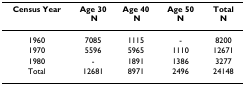

In [355]:
from IPython.display import Image as ij
IMAGE_PATH = 'D:/pubsmall/train/PMC538253_001_00.png'
pil_img = ij(filename=IMAGE_PATH)
display(pil_img)

In [356]:
input_ids,row_pred,col_pred = test_image(IMAGE_PATH)
word_level_data = [] 
final_boxes = []
for ids, r, c in zip(input_ids, row_pred, col_pred):
    if ids in [tokenizer.cls_token_id,tokenizer.sep_token_id,tokenizer.pad_token_id]:
        continue
    elif tokenizer.decode([ids]).startswith("##"):
        word_level_data[-1] = word_level_data[-1]+tokenizer.decode([ids]).replace("##","")
    else:
        word_level_data.append(tokenizer.decode([ids]))
        final_boxes.append((r,c))
max_row = max([i[1] for i in final_boxes])
max_col = max([i[0] for i in final_boxes])
fin_df = [ [""]*(max_row+1) for i in range(max_col+1)]
for w,p in zip(word_level_data,final_boxes):
    fin_df[p[0]][p[1]] += " "+str(w)
df = pd.DataFrame(fin_df)
new_header = df.iloc[0] 
df = df[1:]
df.columns = new_header
df

PMC538253_001_00.png


,census year,age 30 n,age 40 n,age 50 n,total n
1,1960,7085,1115,-,8200
2,1970,5596,5965,1110,12671
3,1980,-,1891,1386,3277
4,total,12681,8971,2496,24148


# Checking Ground Truth

In [357]:
new_header = start_df.iloc[0] 
start_df = start_df[1:]
start_df.columns = new_header
start_df 

,Census Year,Age 30 N,Age 40 N,Age 50 N,Total N
1,1960,7085,1115,-,8200
2,1970,5596,5965,1110,12671
3,1980,-,1891,1386,3277
4,Total,12681,8971,2496,24148


# TWS Calculation

In [358]:
row_len  = max(df.shape[0],start_df.shape[0])
col_len  = max(df.shape[1],start_df.shape[1])
corr = 0
for i in range(row_len):
    for j in range(col_len):
        try:
            if str(df.iloc[i][j]).lower().replace(" ","") == str(start_df.iloc[i][j]).lower().replace(" ",""):
                corr+=1
        except:
            pass
corr/(start_df.shape[0]*start_df.shape[1])

1.0